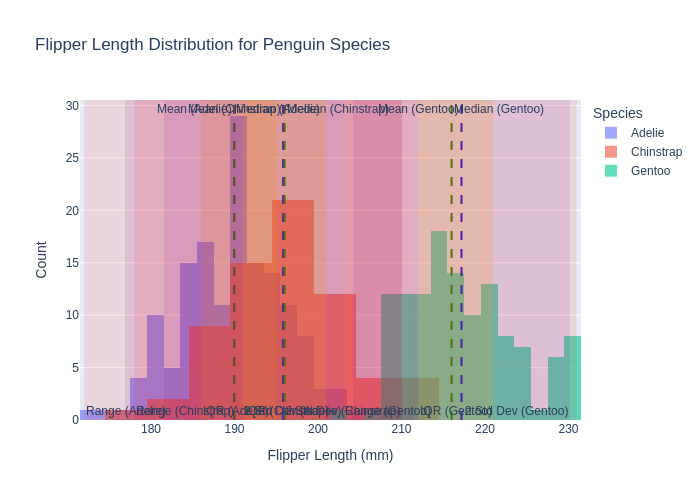

In [58]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Filter out rows with missing values in flipper_length_mm
penguins = penguins.dropna(subset=["flipper_length_mm"])

# Function to calculate statistics
def calculate_statistics(data):
    mean = data.mean()
    median = data.median()
    min_val = data.min()
    max_val = data.max()
    std = data.std()
    iqr = data.quantile(0.75) - data.quantile(0.25)
    lower_iqr = data.quantile(0.25)
    upper_iqr = data.quantile(0.75)
    return mean, median, min_val, max_val, std, iqr, lower_iqr, upper_iqr

# Create histograms for each species
species_list = penguins['species'].unique()

# Initialize a figure
fig = go.Figure()

for species in species_list:
    # Filter the data for the species
    species_data = penguins[penguins['species'] == species]
    
    # Calculate statistics
    flipper_length = species_data['flipper_length_mm']
    mean, median, min_val, max_val, std, iqr, lower_iqr, upper_iqr = calculate_statistics(flipper_length)
    
    # Add histogram
    fig.add_trace(go.Histogram(x=flipper_length, name=species, opacity=0.6))
    
    # Add lines for mean and median
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), annotation_text=f"Mean ({species})", annotation_position="top left")
    fig.add_vline(x=median, line=dict(color='green', dash='dash'), annotation_text=f"Median ({species})", annotation_position="top right")
    
    # Add rectangles for scales
    # Range (min to max)
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="red", opacity=0.1, line_width=0, annotation_text=f"Range ({species})", annotation_position="bottom left")
    
    # Interquartile range
    fig.add_vrect(x0=lower_iqr, x1=upper_iqr, fillcolor="orange", opacity=0.2, line_width=0, annotation_text=f"IQR ({species})", annotation_position="bottom left")
    
    # 2 standard deviations from the mean
    fig.add_vrect(x0=mean - 2 * std, x1=mean + 2 * std, fillcolor="purple", opacity=0.1, line_width=0, annotation_text=f"2 Std Dev ({species})", annotation_position="bottom right")

# Update layout
fig.update_layout(
    title="Flipper Length Distribution for Penguin Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode="overlay",
    legend_title="Species",
)

# Show the plot
fig.show(renderer="png")

In [59]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Filter out rows with missing values in flipper_length_mm
penguins = penguins.dropna(subset=["flipper_length_mm"])

# Function to calculate statistics
def calculate_statistics(data):
    mean = data.mean()
    median = data.median()
    min_val = data.min()
    max_val = data.max()
    std = data.std()
    iqr = data.quantile(0.75) - data.quantile(0.25)
    lower_iqr = data.quantile(0.25)
    upper_iqr = data.quantile(0.75)
    return mean, median, min_val, max_val, std, iqr, lower_iqr, upper_iqr

# Create histograms for each species
species_list = penguins['species'].unique()

# Initialize a figure
fig = go.Figure()

# A counter to stagger label positions
position_counter = 0
colors = ['blue', 'green', 'red']

for idx, species in enumerate(species_list):
    # Filter the data for the species
    species_data = penguins[penguins['species'] == species]
    
    # Calculate statistics
    flipper_length = species_data['flipper_length_mm']
    mean, median, min_val, max_val, std, iqr, lower_iqr, upper_iqr = calculate_statistics(flipper_length)
    
    # Add histogram
    fig.add_trace(go.Histogram(x=flipper_length, name=species, opacity=0.6))
    
    # Adjust label position offsets
    top_pos = 0.95 - (position_counter % 3) * 0.15  # Top positions (staggering)
    bottom_pos = 0.15 + (position_counter % 3) * 0.15  # Bottom positions (staggering)
    
    # Add lines for mean and median with staggered annotations
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'),
                  annotation_text=f"Mean ({species})", annotation_position=f"top {top_pos:.2f}")
    fig.add_vline(x=median, line=dict(color='green', dash='dash'),
                  annotation_text=f"Median ({species})", annotation_position=f"top {top_pos:.2f}")
    
    # Add rectangles for scales with staggered annotations
    # Range (min to max)
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="red", opacity=0.1, line_width=0,
                  annotation_text=f"Range ({species})", annotation_position=f"bottom {bottom_pos:.2f}")
    
    # Interquartile range
    fig.add_vrect(x0=lower_iqr, x1=upper_iqr, fillcolor="orange", opacity=0.2, line_width=0,
                  annotation_text=f"IQR ({species})", annotation_position=f"bottom {bottom_pos:.2f}")
    
    # 2 standard deviations from the mean
    fig.add_vrect(x0=mean - 2 * std, x1=mean + 2 * std, fillcolor="purple", opacity=0.1, line_width=0,
                  annotation_text=f"2 Std Dev ({species})", annotation_position=f"top {top_pos:.2f}")
    
    position_counter += 1

# Update layout
fig.update_layout(
    title="Flipper Length Distribution for Penguin Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode="overlay",
    legend_title="Species",
)

# Show the plot
fig.show(renderer="png")

ValueError: Invalid annotation position "top 0.95"

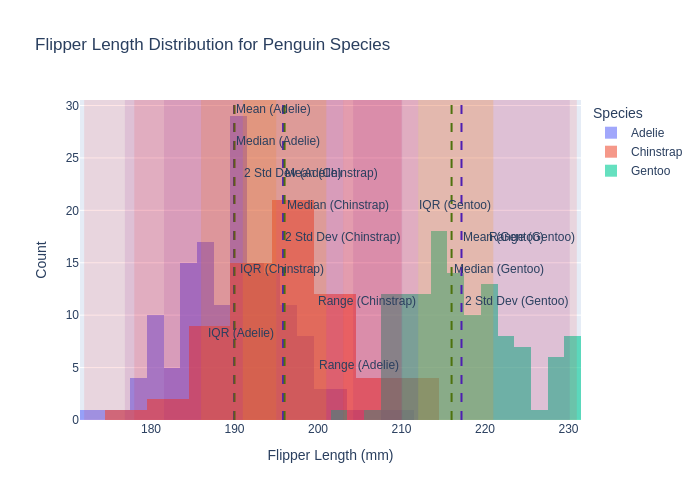

In [60]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Filter out rows with missing values in flipper_length_mm
penguins = penguins.dropna(subset=["flipper_length_mm"])

# Function to calculate statistics
def calculate_statistics(data):
    mean = data.mean()
    median = data.median()
    min_val = data.min()
    max_val = data.max()
    std = data.std()
    iqr = data.quantile(0.75) - data.quantile(0.25)
    lower_iqr = data.quantile(0.25)
    upper_iqr = data.quantile(0.75)
    return mean, median, min_val, max_val, std, iqr, lower_iqr, upper_iqr

# Create histograms for each species
species_list = penguins['species'].unique()

# Initialize a figure
fig = go.Figure()

# A counter to stagger label positions
position_counter = 0
colors = ['blue', 'green', 'red']

for idx, species in enumerate(species_list):
    # Filter the data for the species
    species_data = penguins[penguins['species'] == species]
    
    # Calculate statistics
    flipper_length = species_data['flipper_length_mm']
    mean, median, min_val, max_val, std, iqr, lower_iqr, upper_iqr = calculate_statistics(flipper_length)
    
    # Add histogram
    fig.add_trace(go.Histogram(x=flipper_length, name=species, opacity=0.6))
    
    # Adjust label position offsets
    top_pos = 1 - (position_counter % 3) * 0.2  # Staggered top positions
    bottom_pos = 0.2 + (position_counter % 3) * 0.2  # Staggered bottom positions
    
    # Add lines for mean and median with staggered annotations using `annotation_y`
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'),
                  annotation_text=f"Mean ({species})", annotation_y=top_pos)
    fig.add_vline(x=median, line=dict(color='green', dash='dash'),
                  annotation_text=f"Median ({species})", annotation_y=top_pos - 0.1)
    
    # Add rectangles for scales with staggered annotations
    # Range (min to max)
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="red", opacity=0.1, line_width=0,
                  annotation_text=f"Range ({species})", annotation_y=bottom_pos)
    
    # Interquartile range
    fig.add_vrect(x0=lower_iqr, x1=upper_iqr, fillcolor="orange", opacity=0.2, line_width=0,
                  annotation_text=f"IQR ({species})", annotation_y=bottom_pos + 0.1)
    
    # 2 standard deviations from the mean
    fig.add_vrect(x0=mean - 2 * std, x1=mean + 2 * std, fillcolor="purple", opacity=0.1, line_width=0,
                  annotation_text=f"2 Std Dev ({species})", annotation_y=top_pos - 0.2)
    
    position_counter += 1

# Update layout
fig.update_layout(
    title="Flipper Length Distribution for Penguin Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode="overlay",
    legend_title="Species",
)

# Show the plot
fig.show(renderer="png")

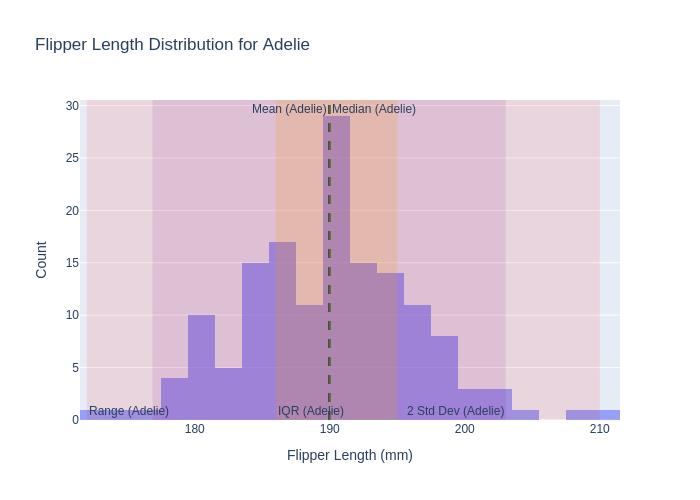

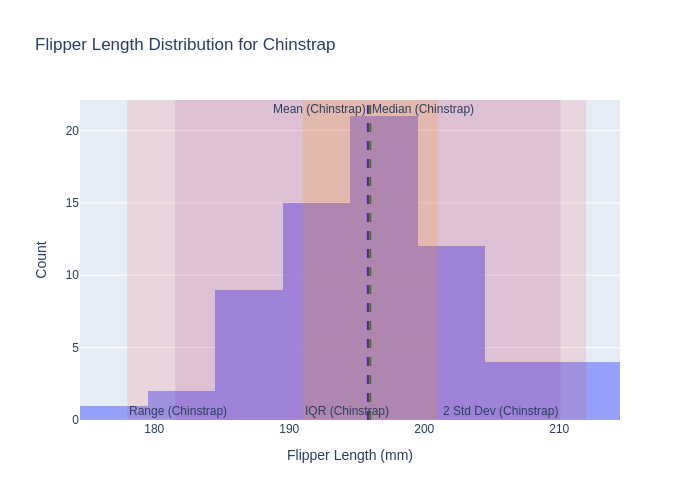

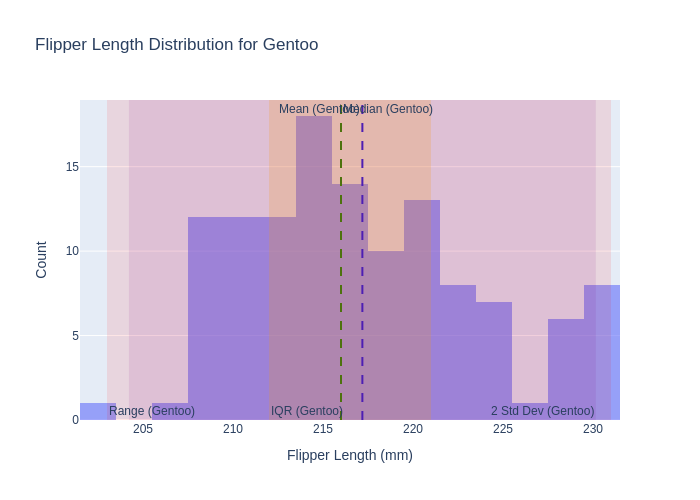

In [61]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Filter out rows with missing values in flipper_length_mm
penguins = penguins.dropna(subset=["flipper_length_mm"])

# Function to calculate statistics
def calculate_statistics(data):
    mean = data.mean()
    median = data.median()
    min_val = data.min()
    max_val = data.max()
    std = data.std()
    iqr = data.quantile(0.75) - data.quantile(0.25)
    lower_iqr = data.quantile(0.25)
    upper_iqr = data.quantile(0.75)
    return mean, median, min_val, max_val, std, iqr, lower_iqr, upper_iqr

# Create histograms for each species
species_list = penguins['species'].unique()

# Iterate over each species and create separate figures
for idx, species in enumerate(species_list):
    # Filter the data for the species
    species_data = penguins[penguins['species'] == species]
    
    # Calculate statistics
    flipper_length = species_data['flipper_length_mm']
    mean, median, min_val, max_val, std, iqr, lower_iqr, upper_iqr = calculate_statistics(flipper_length)
    
    # Initialize a new figure for each species
    fig = go.Figure()
    
    # Add histogram
    fig.add_trace(go.Histogram(x=flipper_length, name=species, opacity=0.6))
    
    # Add lines for mean and median
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), annotation_text=f"Mean ({species})", annotation_position="top left")
    fig.add_vline(x=median, line=dict(color='green', dash='dash'), annotation_text=f"Median ({species})", annotation_position="top right")
    
    # Add rectangles for scales
    # Range (min to max)
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="red", opacity=0.1, line_width=0, annotation_text=f"Range ({species})", annotation_position="bottom left")
    
    # Interquartile range
    fig.add_vrect(x0=lower_iqr, x1=upper_iqr, fillcolor="orange", opacity=0.2, line_width=0, annotation_text=f"IQR ({species})", annotation_position="bottom left")
    
    # 2 standard deviations from the mean
    fig.add_vrect(x0=mean - 2 * std, x1=mean + 2 * std, fillcolor="purple", opacity=0.1, line_width=0, annotation_text=f"2 Std Dev ({species})", annotation_position="bottom right")
    
    # Update layout for each figure
    fig.update_layout(
        title=f"Flipper Length Distribution for {species}",
        xaxis_title="Flipper Length (mm)",
        yaxis_title="Count",
        legend_title="Statistics",
        barmode="overlay",
    )
    
    # Show the plot for each species
    fig.show(renderer="png")

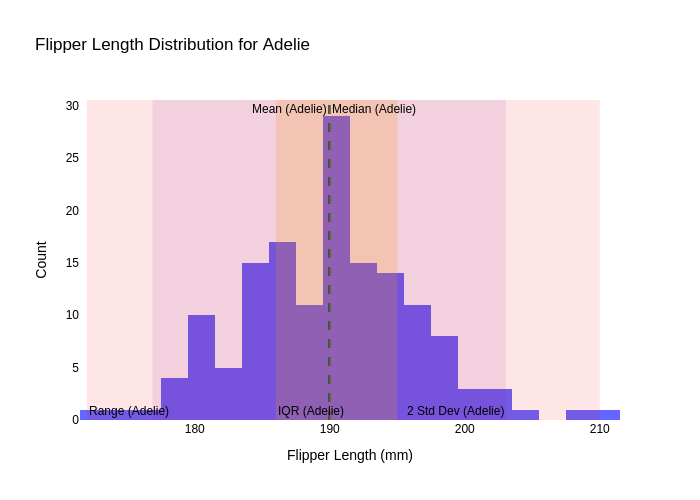

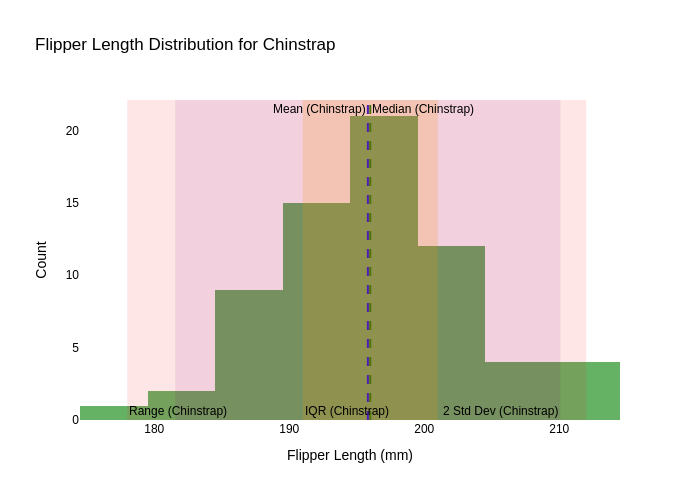

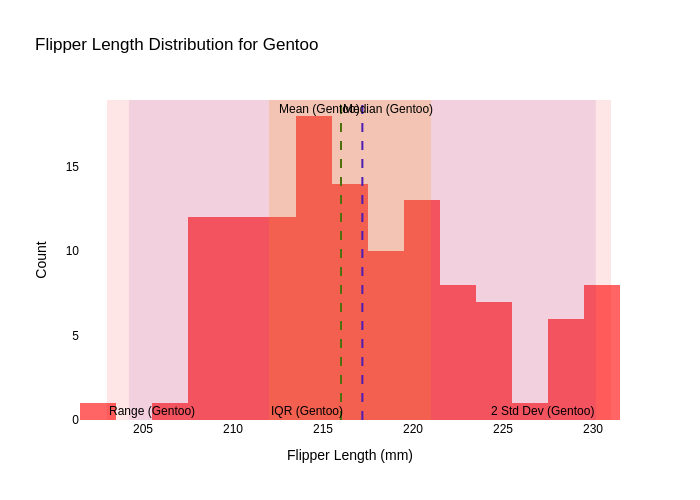

In [62]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Filter out rows with missing values in flipper_length_mm
penguins = penguins.dropna(subset=["flipper_length_mm"])

# Function to calculate statistics
def calculate_statistics(data):
    mean = data.mean()
    median = data.median()
    min_val = data.min()
    max_val = data.max()
    std = data.std()
    iqr = data.quantile(0.75) - data.quantile(0.25)
    lower_iqr = data.quantile(0.25)
    upper_iqr = data.quantile(0.75)
    return mean, median, min_val, max_val, std, iqr, lower_iqr, upper_iqr

# Color mapping for each species
colors = {
    'Adelie': 'blue',
    'Chinstrap': 'green',
    'Gentoo': 'red'
}

# Create histograms for each species
species_list = penguins['species'].unique()

# Iterate over each species and create separate figures
for species in species_list:
    # Filter the data for the species
    species_data = penguins[penguins['species'] == species]
    
    # Calculate statistics
    flipper_length = species_data['flipper_length_mm']
    mean, median, min_val, max_val, std, iqr, lower_iqr, upper_iqr = calculate_statistics(flipper_length)
    
    # Initialize a new figure for each species
    fig = go.Figure()
    
    # Add histogram with species-specific color
    fig.add_trace(go.Histogram(x=flipper_length, name=species, opacity=0.6, marker_color=colors[species]))
    
    # Add lines for mean and median
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), annotation_text=f"Mean ({species})", annotation_position="top left")
    fig.add_vline(x=median, line=dict(color='green', dash='dash'), annotation_text=f"Median ({species})", annotation_position="top right")
    
    # Add rectangles for scales
    # Range (min to max)
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="red", opacity=0.1, line_width=0, annotation_text=f"Range ({species})", annotation_position="bottom left")
    
    # Interquartile range
    fig.add_vrect(x0=lower_iqr, x1=upper_iqr, fillcolor="orange", opacity=0.2, line_width=0, annotation_text=f"IQR ({species})", annotation_position="bottom left")
    
    # 2 standard deviations from the mean
    fig.add_vrect(x0=mean - 2 * std, x1=mean + 2 * std, fillcolor="purple", opacity=0.1, line_width=0, annotation_text=f"2 Std Dev ({species})", annotation_position="bottom right")
    
    # Update layout for each figure
    fig.update_layout(
        title=f"Flipper Length Distribution for {species}",
        xaxis_title="Flipper Length (mm)",
        yaxis_title="Count",
        legend_title="Statistics",
        barmode="overlay",
        plot_bgcolor='white',  # Set background to white
        paper_bgcolor='white',  # Set paper background to white
        font=dict(color='black')  # Set text color to black for better contrast
    )
    
    # Show the plot for each species
    fig.show(renderer="png")

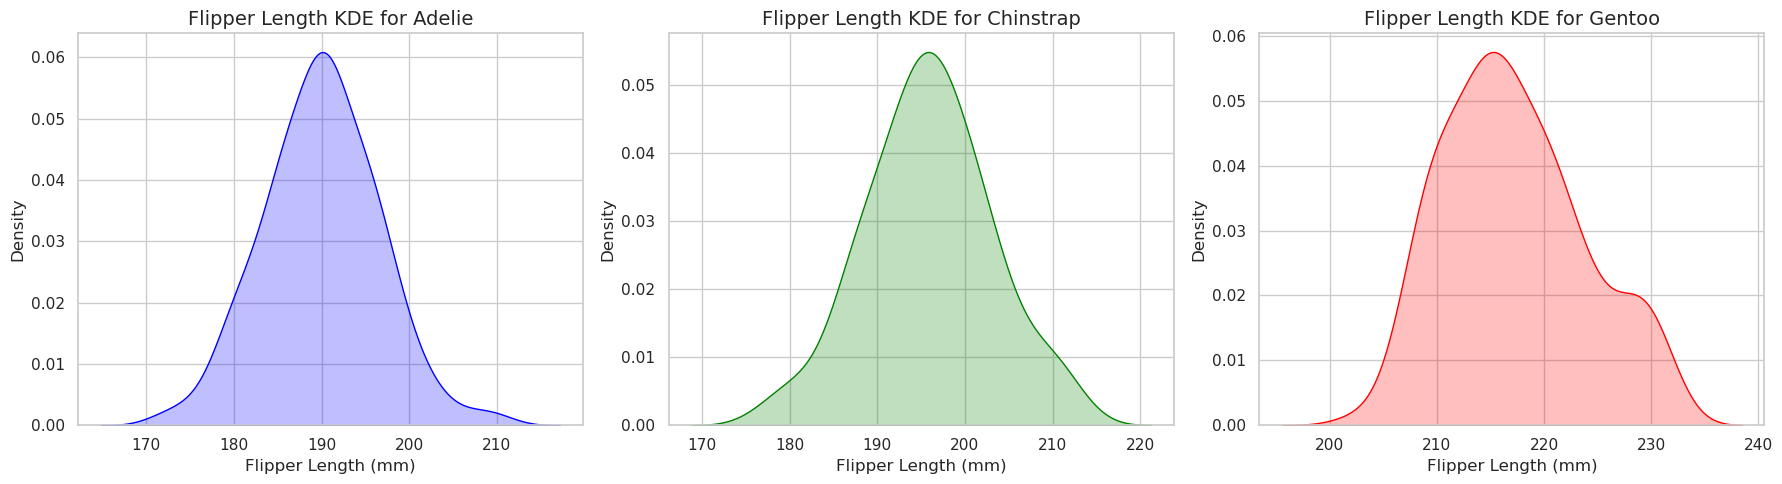

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Filter out rows with missing values in flipper_length_mm
penguins = penguins.dropna(subset=["flipper_length_mm"])

# Set a white background style
sns.set(style="whitegrid")

# Set up a figure and axis to create 3 KDE plots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Color mapping for each species
colors = {
    'Adelie': 'blue',
    'Chinstrap': 'green',
    'Gentoo': 'red'
}

# Create KDE plots for each species
species_list = penguins['species'].unique()

for ax, species in zip(axes, species_list):
    # Filter the data for the species
    species_data = penguins[penguins['species'] == species]
    
    # Plot the KDE
    sns.kdeplot(species_data['flipper_length_mm'], ax=ax, color=colors[species], fill=True)
    
    # Set plot titles and labels
    ax.set_title(f"Flipper Length KDE for {species}", fontsize=14)
    ax.set_xlabel("Flipper Length (mm)", fontsize=12)
    ax.set_ylabel("Density", fontsize=12)

# Adjust layout so the plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()

3. I think I would prefer to visiualize data using a box plot if I'm going to be comparing a multiple goups of data. The box plot would give a excellent summary for each group making the comparison much more efficient than using a histogram. It can also handle large data sets and identify outliers too. That being said, to have a complete visualization of the dataset, I would need to have an idea of the frequency and varaition of the data using either a histogram or a Kernal Density Estimator.

Chatbot Summary:
In this session, we discussed three types of data visualization: **histograms**, **box plots**, and **kernel density estimators (KDEs)**. You requested Python code to visualize **flipper length** data from the penguins dataset, first using **Plotly histograms** with vertical lines and rectangles to mark statistics (mean, median, range, IQR, and standard deviations), and later using **Seaborn KDE plots**. 

We explored the advantages and disadvantages of each plot type:
- **Histograms**: great for visualizing data frequency and distribution shape but sensitive to bin choices.
- **Box plots**: excellent for comparing summary statistics across groups but lack detail on distribution shape.
- **KDEs**: smooth and continuous representation of distributions, but require careful bandwidth selection.

Finally, I provided a comparison of these visualization methods for your course assignment.

ChatGPT link: https://chatgpt.com/share/66f5c7bc-c2d0-8009-88a7-0dc253a25a82

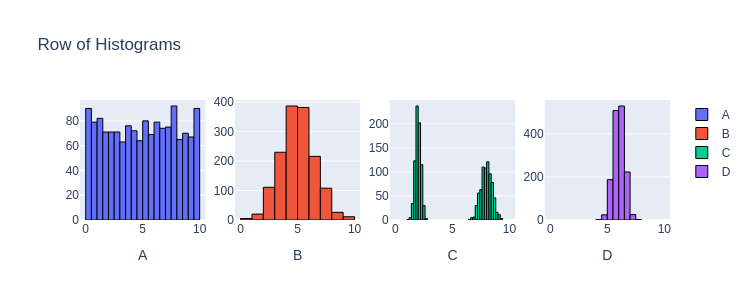

In [65]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    

fig.show(renderer="png")

1.Which datasets have similar means and similar variances? A and C have similar means and valiances
2.Which datasets have similar means but quite different variances? B and C have similar means but different variances
3.Which datasets have similar variances but quite different means? Non of the variances look similar with different means
4.Which datasets have quite different means and quite different variances? C and D have quite different means and quite different variances.

In [14]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)


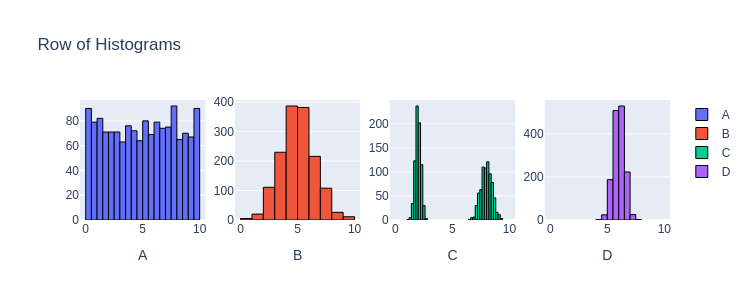

In [66]:
fig.show(renderer="png")

In [23]:
sample1.mean()

3.9708268182075033

In [22]:
np.quantile(sample1, [0.5])

array([3.35734013])

5. 
Right skewed distribution(positively skewed):
fig1 is right skewed as it's tail is on the right
mean is always greater than the median in a right skewed plot, as proven by the code above

Left skewed distribution(negative skewed):
tail is on the left
mean is always less than the median. This is caused by the mean being pulled in the direction of skew. 

Chatbot Summary:
In this chat, we discussed how your provided code demonstrates **right** and **left skewness** using the Gamma distribution. The first sample (`sample1`) generates a **right-skewed** (positively skewed) distribution from a Gamma distribution, where the **mean > median**. The second sample (`sample2`) multiplies the Gamma-distributed data by `-1`, creating a **left-skewed** (negatively skewed) distribution, where the **mean < median**. The code helps visualize the relationship between the mean, median, and skewness.

ChatGPT link: https://chatgpt.com/share/66f61760-1f34-8009-8928-7b1366e9a106

In [39]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/seankross/lego/master/data-tidy/legosets.csv")
df # df.columns


,Item_Number,Name,Year,Theme,Subtheme,Pieces,Minifigures,Image_URL,GBP_MSRP,USD_MSRP,CAD_MSRP,EUR_MSRP,Packaging,Availability
0,10246,Detective's Office,2015,Advanced Models,Modular Buildings,2262.0,6.0,http://images.brickset.com/sets/images/10246-1...,132.99,159.99,199.99,149.99,Box,Retail - limited
1,10247,Ferris Wheel,2015,Advanced Models,Fairground,2464.0,10.0,http://images.brickset.com/sets/images/10247-1...,149.99,199.99,229.99,179.99,Box,Retail - limited
2,10248,Ferrari F40,2015,Advanced Models,Vehicles,1158.0,NaN,http://images.brickset.com/sets/images/10248-1...,69.99,99.99,119.99,89.99,Box,LEGO exclusive
3,10249,Toy Shop,2015,Advanced Models,Winter Village,898.0,NaN,http://images.brickset.com/sets/images/10249-1...,59.99,79.99,NaN,69.99,Box,LEGO exclusive
4,10581,Ducks,2015,Duplo,Forest Animals,13.0,1.0,http://images.brickset.com/sets/images/10581-1...,9.99,9.99,12.99,9.99,Box,Retail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,647,Lorry With Girders,1971,LEGOLAND,Vehicle,52.0,NaN,http://images.brickset.com/sets/images/647-1.jpg,0.55,NaN,NaN,NaN,Box,Retail
6168,648,Service Station,1971,LEGOLAND,Building,55.0,NaN,http://images.brickset.com/sets/images/648-1.jpg,0.55,NaN,NaN,NaN,Box,Retail
6169,795,"2 Large Baseplates, Red/Blue",1971,Basic,Supplementaries,2.0,NaN,http://images.brickset.com/sets/images/795-1.jpg,NaN,2.10,NaN,NaN,Not specified,Not specified
6170,796,"2 Large Baseplates, Green/Yellow",1971,Basic,Supplementaries,2.0,NaN,http://images.brickset.com/sets/images/796-1.jpg,NaN,2.10,NaN,NaN,Not specified,Not specified


In [32]:

df.describe()

,Year,Pieces,Minifigures,GBP_MSRP,USD_MSRP,CAD_MSRP,EUR_MSRP
count,6172.000000,6060.000000,3500.000000,4192.000000,5817.000000,1982.000000,1773.000000
mean,2004.712087,215.168647,2.845429,23.448616,27.896813,46.337482,35.982640
std,8.914686,356.197637,2.720965,31.929169,39.320153,58.458461,46.611047
min,1971.000000,0.000000,1.000000,0.000000,0.000000,2.990000,0.000000
25%,2000.000000,30.000000,1.000000,5.990000,6.000000,12.990000,9.990000
50%,2006.000000,82.000000,2.000000,12.990000,14.990000,24.990000,19.990000
75%,2012.000000,256.250000,4.000000,29.990000,34.990000,54.990000,39.990000
max,2015.000000,5922.000000,32.000000,509.990000,789.990000,789.990000,699.990000


In [33]:
df.mode()

,Item_Number,Name,Year,Theme,Subtheme,Pieces,Minifigures,Image_URL,GBP_MSRP,USD_MSRP,CAD_MSRP,EUR_MSRP,Packaging,Availability
0,71002,City Advent Calendar,2014.0,Duplo,Episode IV-VI,1.0,1.0,http://images.brickset.com/sets/images/0011-2.jpg,9.99,19.99,24.99,9.99,Box,Retail
1,71008,NaN,NaN,NaN,NaN,NaN,NaN,http://images.brickset.com/sets/images/0011-3.jpg,NaN,NaN,NaN,NaN,NaN,NaN
2,71009,NaN,NaN,NaN,NaN,NaN,NaN,http://images.brickset.com/sets/images/10-1.jpg,NaN,NaN,NaN,NaN,NaN,NaN
3,8683,NaN,NaN,NaN,NaN,NaN,NaN,http://images.brickset.com/sets/images/1000-1.jpg,NaN,NaN,NaN,NaN,NaN,NaN
4,8684,NaN,NaN,NaN,NaN,NaN,NaN,http://images.brickset.com/sets/images/10000-1...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://images.brickset.com/sets/images/VANCOUV...,NaN,NaN,NaN,NaN,NaN,NaN
6168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://images.brickset.com/sets/images/VICTOR-...,NaN,NaN,NaN,NaN,NaN,NaN
6169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://images.brickset.com/sets/images/VSDCC1-...,NaN,NaN,NaN,NaN,NaN,NaN
6170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://images.brickset.com/sets/images/WAUWATO...,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
lego_data = pd.read_csv(url)


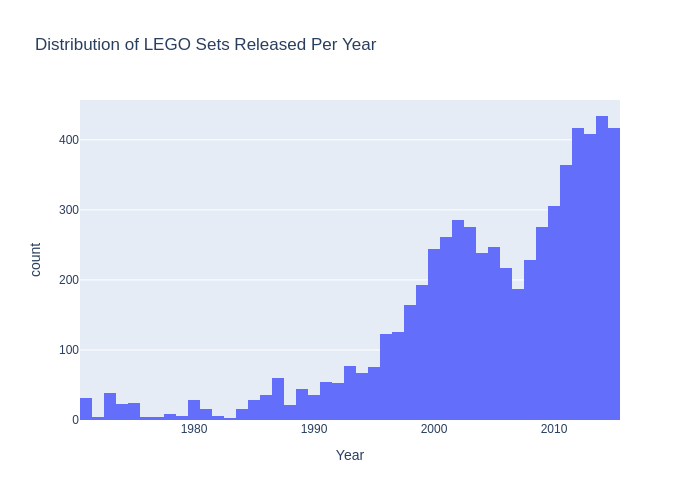

In [67]:
import pandas as pd
import plotly.express as px

url = 'https://raw.githubusercontent.com/seankross/lego/master/data-tidy/legosets.csv'
lego_data = pd.read_csv(url)

fig = px.histogram(lego_data, x='Year', nbins=len(lego_data['Year'].unique()), 
                   title='Distribution of LEGO Sets Released Per Year')

fig.show(renderer="png")

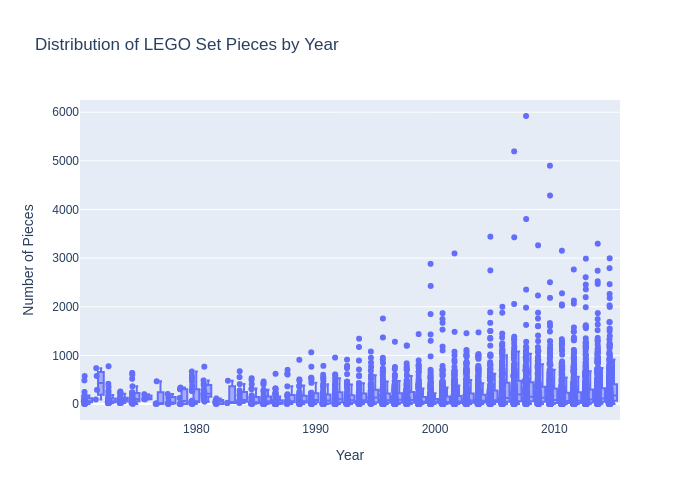

In [68]:
import pandas as pd
import plotly.express as px

# Load the dataset
url = 'https://raw.githubusercontent.com/seankross/lego/master/data-tidy/legosets.csv'
lego_data = pd.read_csv(url)

# Clean column names in case there are any spaces
lego_data.columns = lego_data.columns.str.strip()

# Create a box plot for 'Pieces' by 'Year'
fig = px.box(lego_data, x='Year', y='Pieces', 
             title='Distribution of LEGO Set Pieces by Year',
             labels={'Year': 'Year', 'Pieces': 'Number of Pieces'},
             points='all'  # Show all points (outliers)
             )

# Show the plot
fig.show(renderer="png")

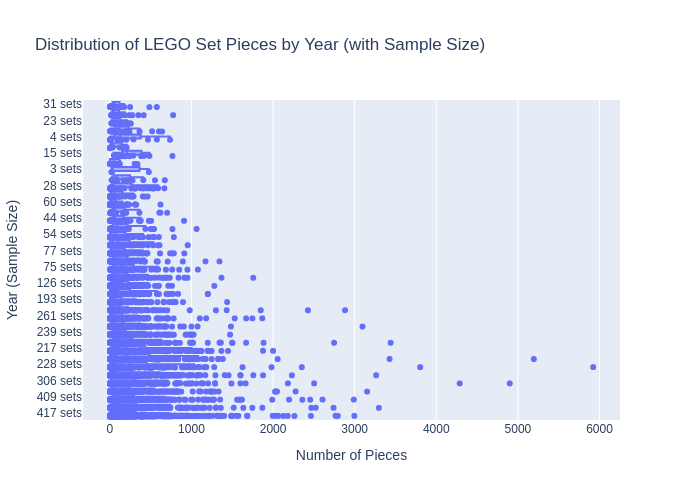

In [69]:
import pandas as pd
import plotly.express as px

# Load the dataset
url = 'https://raw.githubusercontent.com/seankross/lego/master/data-tidy/legosets.csv'
lego_data = pd.read_csv(url)

# Clean column names in case there are any spaces
lego_data.columns = lego_data.columns.str.strip()

# Calculate the sample size (number of sets) per year
sample_size = lego_data.groupby('Year').size().reset_index(name='count')

# Create a new column for the year labels that includes the sample size
lego_data['Year_with_sample_size'] = lego_data['Year'].map(
    sample_size.set_index('Year')['count'].apply(lambda x: f"{x} sets")
)

# Create a vertical box plot with the sample size in the y-axis labels
fig = px.box(lego_data, y='Year_with_sample_size', x='Pieces', 
             title='Distribution of LEGO Set Pieces by Year (with Sample Size)',
             labels={'Year_with_sample_size': 'Year (Sample Size)', 'Pieces': 'Number of Pieces'},
             points='all'  # Show all points (outliers)
             )

# Show the plot
fig.show(renderer="png")

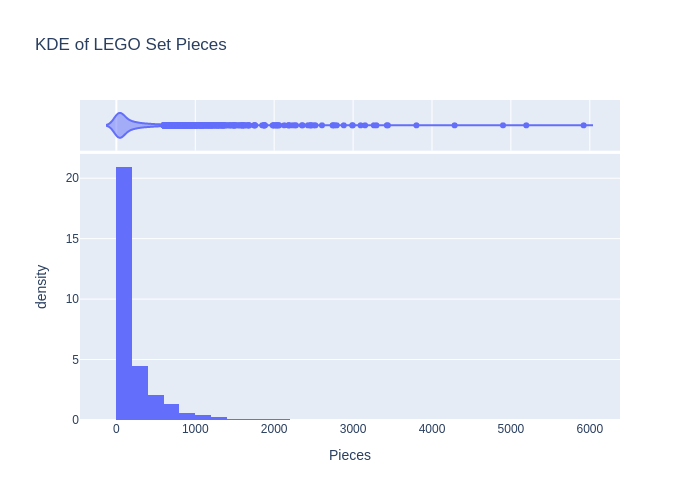

In [70]:
import pandas as pd
import plotly.express as px

# Load the dataset
url = 'https://raw.githubusercontent.com/seankross/lego/master/data-tidy/legosets.csv'
lego_data = pd.read_csv(url)

# Clean column names in case there are any spaces
lego_data.columns = lego_data.columns.str.strip()

# Create a KDE plot using Plotly
fig = px.histogram(lego_data, x='Pieces', nbins=50, 
                   title='KDE of LEGO Set Pieces',
                   marginal='violin',  # Adds a KDE (violin) plot to the histogram
                   histnorm='density')  # Normalizes the histogram to show density

# Show the plot
fig.show(renderer="png")

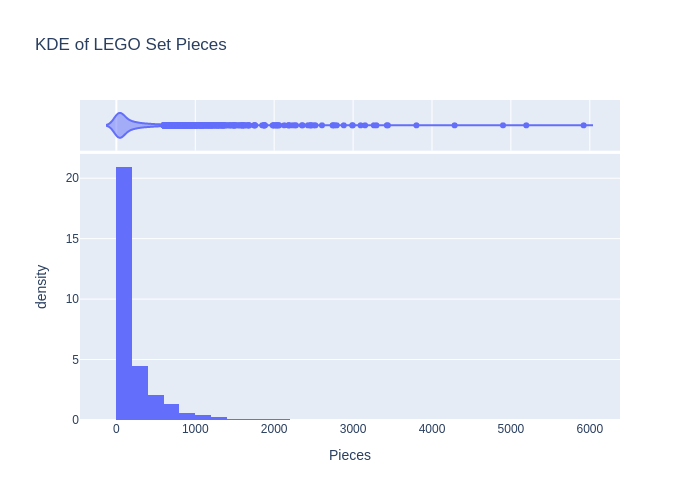

In [71]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show(renderer="png")

In [72]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])


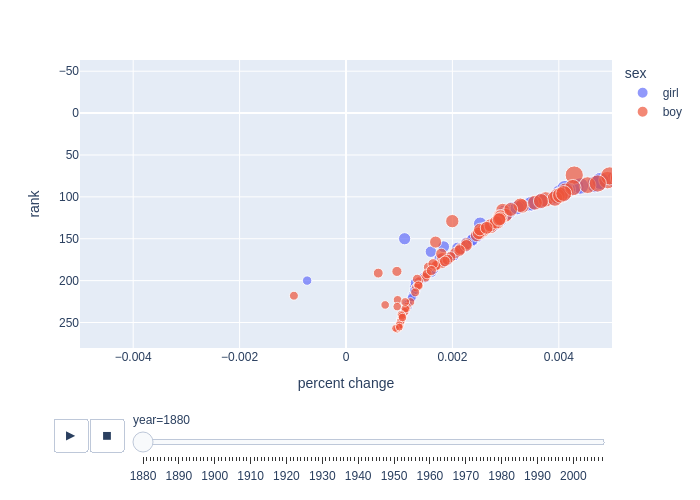

In [55]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

9.Yes